In [1]:
import argparse
import sm_network
import sm_data as data
import image
import numpy as np
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt


In [3]:
def softmax(hyperparemeters):
    network = sm_network.Network(hyperparameters, sm_network.softmax, sm_network.multiclass_cross_entropy, 10)
    val_acc = []
    val_loss = np.zeros((10,100))
    train_loss = np.zeros((10,100))
    fold_idx = 0
    for train_set, val_set in data.generate_k_fold_set((train_images,train_labels), 10):
        
        loss = np.Inf
         
        for epoch in range(100): #hyperparameters.epoch
            
            #train_set = data.shuffle(train_set)
            # stochastic gradient descent on every mini-batch
            tot_batch = 0
            for minibatch in data.generate_minibatches(train_set, 512):
                train_loss_value, train_acc = network.train(minibatch)
                train_loss[fold_idx][epoch] += train_loss_value
                tot_batch += 1
            # test performance on validation
            train_loss[fold_idx][epoch] /= tot_batch
            average_loss, acc = network.test(val_set)
            val_loss[fold_idx][epoch] = average_loss
            val_acc.append(acc)
            
            #if average_loss > loss:
            #    break
            loss = average_loss
        
        fold_idx += 1
    
    val_loss_avg = np.sum(val_loss, axis = 0) / 10
    train_loss = np.sum(train_loss, axis = 0) / 10
    for i in range(100):
        print(i,'th epoch average validation loss','   ',val_loss_avg[i])
    
    test_loss, test_acc = network.test((test_images, test_labels))
     
    return network.weights, train_loss, val_acc, val_loss, val_loss_avg, test_loss, test_acc



In [35]:
train_images, train_labels = data.load_data('')
test_images, test_labels = data.load_data('', train = False)

In [36]:
train_images, train_labels = data.shuffle((train_images, train_labels))

In [37]:
#train_images, train_max, train_min = data.min_max_normalize(train_images)
#test_images, test_max, test_max = data.min_max_normalize(test_images)


train_images, train_mean, train_std = data.z_score_normalize(train_images)
test_images, test_mean, test_std = data.z_score_normalize(test_images)

In [34]:
parser = argparse.ArgumentParser(description = 'CSE151B PA1')
parser.add_argument('--batch_size', type = int, default = 256,
        help = 'input batch size for training (default: 1)')
parser.add_argument('--epochs', type = int, default = 100,
        help = 'number of epochs to train (default: 100)')
parser.add_argument('--learningrate', type = float, default = 0.01,
        help = 'learning rate (default: 0.001)')
parser.add_argument('--zscore', dest = 'normalization', action='store_const', 
        default = data.min_max_normalize, const = data.z_score_normalize,
        help = 'use z-score normalization on the dataset, default is min-max normalization')
parser.add_argument('--folds', type = int, default = 10,
        help = 'number of folds for cross-validation')
parser.add_argument('--p', type = int, default = 70,
        help = 'number of principal components')

hyperparameters, unknown = parser.parse_known_args()

In [8]:
hyperparameters.epochs

100

In [38]:
pca = PCA(hyperparameters.p)
pca.fit(train_images)
train_images = pca.transform(train_images)
test_images = pca.transform(test_images)

In [39]:
train_labels = data.onehot_encode(train_labels)
test_labels = data.onehot_encode(test_labels)

In [40]:
train_images = data.append_bias(train_images)
test_images = data.append_bias(test_images)

In [35]:
train_images.shape

(60000, 31)

In [41]:
weights, train_loss, val_acc, val_loss, val_loss_avg, test_loss, test_acc = softmax(hyperparameters)

0 th epoch average validation loss     0.3261127362212548
1 th epoch average validation loss     0.316103826993358
2 th epoch average validation loss     0.31239251294710535
3 th epoch average validation loss     0.3104690368891675
4 th epoch average validation loss     0.30931224074670816
5 th epoch average validation loss     0.3085563057816425
6 th epoch average validation loss     0.3080363280578606
7 th epoch average validation loss     0.3076666075228061
8 th epoch average validation loss     0.3073980359921764
9 th epoch average validation loss     0.3072003950869923
10 th epoch average validation loss     0.3070540565253517
11 th epoch average validation loss     0.3069457201653962
12 th epoch average validation loss     0.30686606404593675
13 th epoch average validation loss     0.30680837234475977
14 th epoch average validation loss     0.3067676957501347
15 th epoch average validation loss     0.30674031707360394
16 th epoch average validation loss     0.30672339963542117
17

In [ ]:
###PCA Weights visualization

In [104]:
weights.shape

(71, 10)

In [42]:
weights

array([[-1.67002263e+00, -1.45264895e+00,  1.12739753e+00,
         1.18144457e+00, -8.92350428e-01,  1.75337727e+00,
        -1.10167151e+00, -1.13974736e+00,  2.03400532e+00,
         1.60216208e-01],
       [-4.93793926e-01,  5.81915257e-01,  1.23936556e-01,
         1.78309100e-01, -2.28191893e-01, -8.64284674e-02,
        -4.16588895e-02, -5.98921630e-02,  1.16964233e-01,
        -9.11598067e-02],
       [ 4.54491636e-01,  8.15955745e-02,  3.33461259e-01,
         2.23471317e-01, -4.26988271e-01,  2.12836477e-01,
         2.15694053e-01, -6.15059508e-01,  7.96280236e-02,
        -5.59130560e-01],
       [-3.00122962e-01,  1.16228953e-01, -1.74688733e-01,
         3.71178524e-01, -8.21269442e-02,  5.89976842e-02,
        -3.14935931e-01,  1.18052118e-01,  5.97598830e-02,
         1.47657408e-01],
       [-4.10115912e-01,  1.50557574e-01,  3.65002840e-01,
        -1.27042152e-01,  2.38562273e-01, -3.42332799e-01,
         3.75516838e-01, -1.46803574e-01, -3.58088406e-02,
        -6.

In [43]:
weights_no_bias = np.delete(weights, 0, axis = 0)

In [44]:
pca_matrix = pca.components_

In [48]:
pca_matrix.shape

(70, 784)

In [45]:
weights_full_dim = pca_matrix.T @ weights_no_bias

In [46]:
weights_full_dim.shape

(784, 10)

digit_class:0


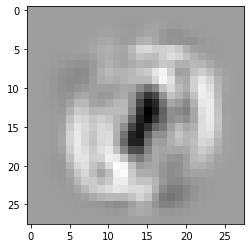

digit_class:1


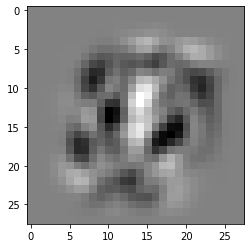

digit_class:2


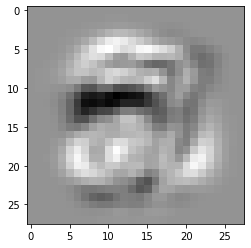

digit_class:3


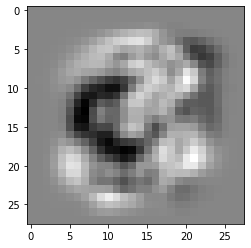

digit_class:4


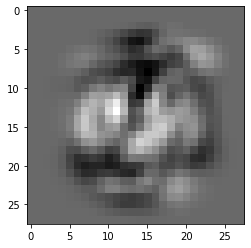

digit_class:5


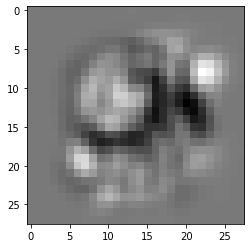

digit_class:6


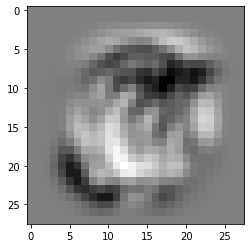

digit_class:7


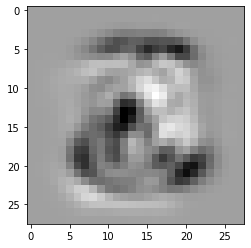

digit_class:8


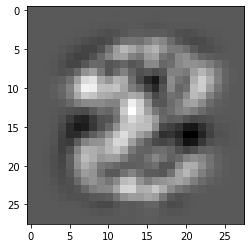

digit_class:9


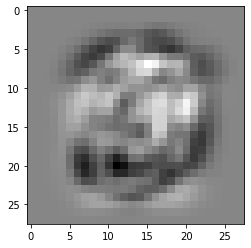

In [47]:
for i in range(10):
    weight_arr = weights_full_dim.T[i]
    print('digit_class:' + str(i))
    plt.imshow(weight_arr.reshape(28,28), cmap='gray')
    plt.show()

In [118]:
pca_matrix.shape

(70, 784)

Text(0.5, 1.0, 'number of epochs vs validation loss during training')

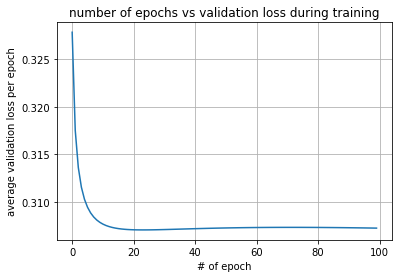

In [101]:
#batch_size = 512, learningrate = 0.01, PCA = 70, z-score normalization, TEST_LOSS =0.29427990497800804
#TEST_ACC = 0.9166


x = [i for i in range(100)]
plt.xlabel('# of epochs')
plt.ylabel('average validation loss per epoch')
plt.plot(x, val_loss_avg)
plt.grid(True)
plt.title('number of epochs vs validation loss during training')


Text(0.5, 1.0, 'number of epochs vs training loss during training')

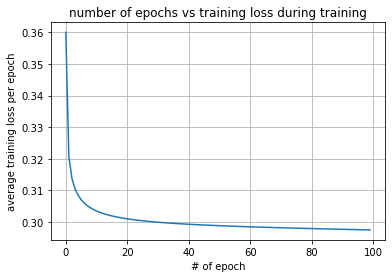

In [102]:
x = [i for i in range(100)]
plt.xlabel('# of epochs')
plt.ylabel('average training loss per epoch')
plt.plot(x, train_loss)
plt.grid(True)
plt.title('number of epochs vs training loss during training')


In [98]:
val_acc

[0.8556666666666667,
 0.877,
 0.8828333333333334,
 0.8883333333333333,
 0.8925,
 0.8945,
 0.896,
 0.8976666666666666,
 0.899,
 0.9,
 0.9016666666666666,
 0.9015,
 0.9015,
 0.9031666666666667,
 0.9035,
 0.9048333333333334,
 0.905,
 0.9055,
 0.9056666666666666,
 0.9066666666666666,
 0.9066666666666666,
 0.9066666666666666,
 0.9071666666666667,
 0.908,
 0.908,
 0.908,
 0.9078333333333334,
 0.9088333333333334,
 0.9091666666666667,
 0.9095,
 0.9096666666666666,
 0.91,
 0.9096666666666666,
 0.9096666666666666,
 0.9096666666666666,
 0.9096666666666666,
 0.9098333333333334,
 0.9098333333333334,
 0.9096666666666666,
 0.91,
 0.9103333333333333,
 0.9098333333333334,
 0.9098333333333334,
 0.9101666666666667,
 0.9103333333333333,
 0.9101666666666667,
 0.9101666666666667,
 0.91,
 0.9101666666666667,
 0.91,
 0.91,
 0.9103333333333333,
 0.9108333333333334,
 0.9108333333333334,
 0.9108333333333334,
 0.9108333333333334,
 0.911,
 0.911,
 0.911,
 0.9106666666666666,
 0.9106666666666666,
 0.910833333333333

In [93]:
train_loss[-100:]

array([0.36084885, 0.32126851, 0.31434882, 0.31100569, 0.30894759,
       0.30752127, 0.30646017, 0.30563252, 0.3049647 , 0.30441192,
       0.30394513, 0.30354457, 0.30319624, 0.30288993, 0.30261799,
       0.30237456, 0.30215506, 0.30195587, 0.30177407, 0.30160728,
       0.30145355, 0.30131125, 0.30117903, 0.30105572, 0.30094036,
       0.30083209, 0.30073019, 0.30063403, 0.30054307, 0.30045683,
       0.30037488, 0.30029684, 0.3002224 , 0.30015126, 0.30008314,
       0.30001782, 0.29995509, 0.29989475, 0.29983664, 0.29978059,
       0.29972646, 0.29967413, 0.29962348, 0.2995744 , 0.29952679,
       0.29948056, 0.29943563, 0.29939192, 0.29934936, 0.29930789,
       0.29926744, 0.29922797, 0.29918941, 0.29915172, 0.29911485,
       0.29907877, 0.29904344, 0.29900881, 0.29897485, 0.29894154,
       0.29890884, 0.29887673, 0.29884517, 0.29881415, 0.29878364,
       0.29875361, 0.29872406, 0.29869495, 0.29866628, 0.29863802,
       0.29861016, 0.29858268, 0.29855557, 0.29852881, 0.29850

In [99]:
test_loss

0.28714344948988124

In [100]:
test_acc

0.9184

In [ ]:
BACTH = 256, LEARNING = 0.001, PCA = 100
VAL_LOSS = 1.0230239108555335
TEST_LOSS = 0.29742139263819406
TEST_ACC = 0.9158

In [ ]:
BACTH = 256, LEARNING = 0.01, PCA = 100
VAL_LOSS = 0.30724605907271396
TEST_LOSS =0.28714344948988124
TEST_ACC = 0.9158

In [ ]:
BACTH = 512, LEARNING = 0.01, PCA = 70
VAL_LOSS = 0.30718411118340444
val_acc = 0.9095
TEST_LOSS =0.29427990497800804
TEST_ACC = 0.9166

In [ ]:
BACTH = 128, LEARNING = 0.001, PCA = 100
VAL_LOSS = 0.3040733906843014
TEST_LOSS = 0.2972136601130659

TEST_ACC = 0.915

In [ ]:
BACTH = 256, LEARNING = 0.001, PCA = 70
VAL_LOSS = 0.10229202596667566
TEST_LOSS = 0.3051745952884528
TEST_ACC = 0.9158